In [234]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

### Name-Suraj Kumar Patel
### Roll no.- 1811163

## Vanila Perceptron

In [245]:
def van_perceptron(x_cord,y_cord):
    w = np.zeros(len(x_cord[0]) - 1)
    b = random.random()
    iteration = 10
    ep=0.01
    w_mat=[]
    b_mat=[]
    for p in range(iteration):
        c = 0
        for i in range(len(x_cord)):
            a = 0
            for j in range(len(x_cord[i]) - 1):
                a += w[j] * x_cord[i][j]
            a = a + b
            if y_cord[i] * a <= 0:
                for j in range(len(x_cord[i]) - 1):
                    w[j] += ep*y_cord[i] * x_cord[i][j]
                b += ep*y_cord[i]
        print(w)
        w_mat.append(w.copy())
        b_mat.append(b)
        #print(p,w,b)
    print(w_mat)
    return w, b,w_mat,b_mat

In [240]:
def sign(n):
    sgn = n / abs(n)
    return int(sgn)
def test_for_it(x_test,y_test, w, b):
    count = 0
    for j in range(len(x_test)):
        a_test = 0
        for i in range(len(x_test[j])-1):
            a_test += x_test[j][i] * w[i]
        a = a_test + b
        y_pred = sign(a)
        if y_pred==y_test[j]:
            count+=1
    accur=count/len(x_test)
    return accur
def test_vanila(w_mat,b_mat,x_test,y_test):
    it=[]
    accuracy=[]
    for i in range(len(w_mat)):
        it.append(i)
        w_i=w_mat[i]
        b_i=b_mat[i]
        accur=test_for_it(x_test,y_test, w_i, b_i)
        accuracy.append(accur)
    return accuracy,it

In [241]:
x_cord=np.genfromtxt('iris.csv',delimiter=',')
X=[x for x in x_cord]
y=[x[-1] for x in x_cord]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

[-0.13   0.003 -0.195 -0.075]
[-0.075  0.052 -0.195 -0.077]
[-0.07   0.067 -0.211 -0.083]
[-0.112  0.058 -0.26  -0.1  ]
[-0.112  0.058 -0.26  -0.1  ]
[-0.112  0.058 -0.26  -0.1  ]
[-0.112  0.058 -0.26  -0.1  ]
[-0.112  0.058 -0.26  -0.1  ]
[-0.112  0.058 -0.26  -0.1  ]
[-0.112  0.058 -0.26  -0.1  ]
[array([-0.13 ,  0.003, -0.195, -0.075]), array([-0.075,  0.052, -0.195, -0.077]), array([-0.07 ,  0.067, -0.211, -0.083]), array([-0.112,  0.058, -0.26 , -0.1  ]), array([-0.112,  0.058, -0.26 , -0.1  ]), array([-0.112,  0.058, -0.26 , -0.1  ]), array([-0.112,  0.058, -0.26 , -0.1  ]), array([-0.112,  0.058, -0.26 , -0.1  ]), array([-0.112,  0.058, -0.26 , -0.1  ]), array([-0.112,  0.058, -0.26 , -0.1  ])]
0.9560766350816456


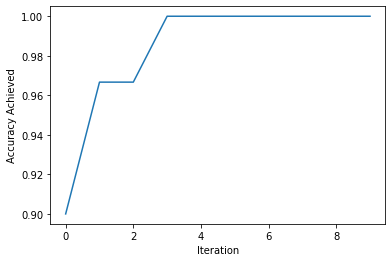

In [246]:
w, b,w_mat,b_mat = van_perceptron(x_train, y_train)
acc,it=test_vanila(w_mat,b_mat,x_test,y_test)
print(b)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Achieved")
plt.plot(it,acc)

Vanila perceptron is giving perfect accuracy from start many of the times 

### Voted perceptron

In [271]:
def perceptron(x_cord, y_cord):
    w = np.random.random(len(x_cord[0]) - 1)
    b = 0
    iteration = 10
    w_m = []
    ep=0.01
    w_mat=[]
    b_m=[]
    c_m=[]
    b_mat=[]
    c_mat=[]
    for p in range(iteration):
        c = 0
        for i in range(len(x_cord)):
            a = 0
            for j in range(len(x_cord[i]) - 1):
                a += w[j] * x_cord[i][j]
            a = a + b
            if y_cord[i] * a <= 0:
                for j in range(len(x_cord[i]) - 1):
                    w[j] += ep*y_cord[i] * x_cord[i][j]
                b += ep*y_cord[i]
                w_m.append([w.copy()])
                b_m.append(b)
                c_m.append(c)
            else:
                c += 1
        w_mat.append(w_m.copy())
        b_mat.append(b_m)
        c_mat.append(c_m)
        #print(p,w,b)
    #print(w_m)
    return w_m,w_mat,b_mat,c_mat

In [272]:
def test_for_it_avg(x_test,y_test, w_mat,b_m,c_m):
    count = 0
    w_mat=np.array(w_mat)
    #print(len(w_mat[0][0]))
    #print(len(b_m))
    for j in range(len(x_test)):
        c_sm=0
        for p in range(len(w_mat)):
            a_test = 0
            for i in range(len(x_test[j])-1):
                a_test += x_test[j][i] * w_mat[p,0,i]
            a = a_test + b_m[p]
            c_sm += sign(a)*c_m[p]
        y_pred=sign(c_sm)
        if y_pred==y_test[j]:
            count+=1
    accur=count/len(x_test)
    return accur

In [273]:
def test_average(w_mat,b_m,c_m,x_test,y_test):
    it=[]
    accuracy=[]
    for i in range(len(w_mat)):
        it.append(i)
        w_i = w_mat[i]
        b_i = b_m[i]
        c_i = c_m[i]
        accur=test_for_it_avg(x_test,y_test, w_i,b_i,c_i)
        accuracy.append(accur)
    return accuracy,it

[0.7333333333333333, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0, 0.5, 'Accuracy Achieved')

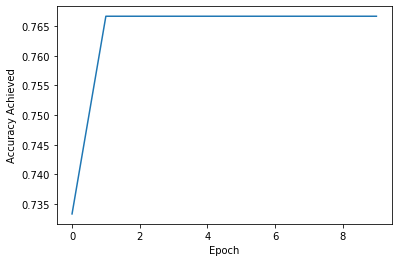

In [279]:
w_m, w_mat,b_m,c_m = perceptron(x_train, y_train)
acc,it=test_average(w_mat,b_m,c_m,x_test,y_test)
plt.plot(it,acc)
print(acc,it)
plt.xlabel("Epoch")
plt.ylabel("Accuracy Achieved")

I think voted percepton gives the full accuracy faster comapre to vanila peceptron

In [275]:
x_cord=np.array([[0.1,0.2,1],[0.3,0.41,1],[0.5,0.6,-1],[0.7,0.8,-1],[0.9,0.10,-1]])
x_cord_T=x_cord.T
y_cord=x_cord_T[len(x_cord_T)-1].astype(int)
w,b,w_,b_=van_perceptron(x_cord,y_cord)
print(w,b)

[-0.021 -0.015]
[-0.042 -0.03 ]
[-0.063 -0.045]
[-0.084 -0.06 ]
[-0.105 -0.075]
[-0.126 -0.09 ]
[-0.147 -0.105]
[-0.168 -0.12 ]
[-0.189 -0.135]
[-0.21 -0.15]
[array([-0.021, -0.015]), array([-0.042, -0.03 ]), array([-0.063, -0.045]), array([-0.084, -0.06 ]), array([-0.105, -0.075]), array([-0.126, -0.09 ]), array([-0.147, -0.105]), array([-0.168, -0.12 ]), array([-0.189, -0.135]), array([-0.21, -0.15])]
[-0.21 -0.15] 0.2822162944251908


In [276]:
x_cord=np.array(x_cord)
x_cord=x_cord.T
x1_cord=x_cord[0]
x2_cord=x_cord[1]

In [257]:
xa=1
xb=-1
if w[1]!=0:
    ya=(-w[0]*xa-b)/w[1]
    yb=(-w[0]*xb-b)/w[1]
else:
    xa=-b/w[0]
    xb=-b/w[0]
    ya=1
    yb=-1

Text(0, 0.5, 'X_2')

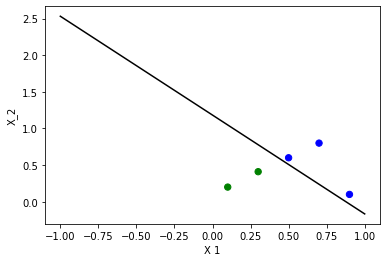

In [258]:
plt.grid(False)
#plt.xlim(-1,1)
#plt.ylim(-1,1)
y_cord=np.array(y_cord)
plt.plot([xa,xb],[ya,yb],color='black')
colormap = np.array(['red', 'green', 'b'])
plt.scatter(x1_cord, x2_cord, s=40, c=colormap[y_cord])
plt.xlabel('X 1')
plt.ylabel('X_2')

Taken help from Shaswat das for voted percptron part